Theoretical orbit response to kick $\theta$:

$$C_{ij} = \theta_i \frac{ \sqrt{\beta_i \beta_j}}{2 \sin{\pi Q}} \cos(  2 \pi | \mu_i - \mu_j| - \pi Q) + \frac{\eta_i \eta_j}{\left( \alpha_C - \frac{1}{\gamma^2}\right) C}$$

LOCO needs to compute

$$M_x = \frac{\partial^2 x_i}{\partial \theta_j \partial k_{1,m}}$$
$$M_y = \frac{\partial^2 y_i}{\partial \theta_j \partial k_{1,m}}$$

where $\{\theta_j\}$ are orbit correctors hor. and vert.

and

$\{ k_{1,m}\}$ are quadrupole normal and skew used for correction, as many as there are power supplies

input:
perturb.param or script generating same
...

In [1]:
print(f"LOCO, AT version")

# init_loco
import sys, os
sys.path.append(os.path.abspath('../'))

from loco import getTheorOrm, getOrm, Loco
from pylab import *


LOCO, AT version
Failed to import elegant utils; elegant engine will not work properly


In [2]:
# the optics model

import at
from at import atpass
from at import elements
from at import get_refpts
from at.load import load_mat
from matplotlib import pyplot as plt
import at.plot
import numpy as np
from pylab import *




B1H = elements.Bend('B1H', 1.3, 0.314159265358979323, 0, EntranceAngle=0, ExitAngle=0)

QF = elements.Quadrupole('QF', 0.1, 1.7)
QD = elements.Quadrupole('QD', 0.1, -2.1)
QS = elements.Quadrupole('QS', 0.1, 0.0) # todo: introduce tilt

SF = elements.Sextupole('SF', 0.01, 50.0)

CXY = elements.Corrector('CXY', 0, [0, 0])
CXY01 = elements.Corrector('CXY', 0, [0, 0])
CXY02 = elements.Corrector('CXY', 0, [0, 0])
CXY03 = elements.Corrector('CXY', 0, [0, 0])
CXY04 = elements.Corrector('CXY', 0, [0, 0])
CXY05 = elements.Corrector('CXY', 0, [0, 0])
CXY06 = elements.Corrector('CXY', 0, [0, 0])
CXY07 = elements.Corrector('CXY', 0, [0, 0])
CXY08 = elements.Corrector('CXY', 0, [0, 0])
CXY09 = elements.Corrector('CXY', 0, [0, 0])
CXY10 = elements.Corrector('CXY', 0, [0, 0])
CXY11 = elements.Corrector('CXY', 0, [0, 0])
CXY12 = elements.Corrector('CXY', 0, [0, 0])
CXY13 = elements.Corrector('CXY', 0, [0, 0])
CXY14 = elements.Corrector('CXY', 0, [0, 0])
CXY15 = elements.Corrector('CXY', 0, [0, 0])
CXY16 = elements.Corrector('CXY', 0, [0, 0])
CXY17 = elements.Corrector('CXY', 0, [0, 0])
CXY18 = elements.Corrector('CXY', 0, [0, 0])
CXY19 = elements.Corrector('CXY', 0, [0, 0])
CXY20 = elements.Corrector('CXY', 0, [0, 0])
CXY21 = elements.Corrector('CXY', 0, [0, 0])
CXY22 = elements.Corrector('CXY', 0, [0, 0])
CXY23 = elements.Corrector('CXY', 0, [0, 0])
CXY24 = elements.Corrector('CXY', 0, [0, 0])
CXY25 = elements.Corrector('CXY', 0, [0, 0])
CXY26 = elements.Corrector('CXY', 0, [0, 0])
CXY27 = elements.Corrector('CXY', 0, [0, 0])
CXY28 = elements.Corrector('CXY', 0, [0, 0])
CXY29 = elements.Corrector('CXY', 0, [0, 0])
CXY30 = elements.Corrector('CXY', 0, [0, 0])
CXY31 = elements.Corrector('CXY', 0, [0, 0])
CXY32 = elements.Corrector('CXY', 0, [0, 0])
CXY33 = elements.Corrector('CXY', 0, [0, 0])
CXY34 = elements.Corrector('CXY', 0, [0, 0])
CXY35 = elements.Corrector('CXY', 0, [0, 0])
CXY36 = elements.Corrector('CXY', 0, [0, 0])
CXY37 = elements.Corrector('CXY', 0, [0, 0])
CXY38 = elements.Corrector('CXY', 0, [0, 0])
CXY39 = elements.Corrector('CXY', 0, [0, 0])
CXY40 = elements.Corrector('CXY', 0, [0, 0])

BPM = elements.Monitor('BPM')

DD = elements.Drift('DD', 0.1)

m0 = elements.Marker('M0')


cell = [B1H, CXY, DD, BPM, QF, DD, B1H, B1H, CXY, DD, BPM, QD, DD, B1H]
ring = [B1H, CXY01, DD, BPM, QF,SF, DD, B1H, B1H, CXY02, DD, BPM, QD, DD, B1H,
B1H, CXY03, DD, BPM, QF,SF, DD, B1H, B1H, CXY04, DD, BPM, QD, DD, B1H,
B1H, CXY05, DD, BPM, QF,SF, DD, B1H, B1H, CXY06, DD, BPM, QD, DD, B1H,
B1H, CXY07, DD, BPM, QF,SF, DD, B1H, B1H, CXY08, DD, BPM, QD, DD, B1H,
B1H, CXY09, DD, BPM, QF,SF, DD, B1H, B1H, CXY10, DD, BPM, QD, DD, B1H,
B1H, CXY11, DD, BPM, QF,SF, DD, B1H, B1H, CXY12, DD, BPM, QD, DD, B1H,
B1H, CXY13, DD, BPM, QF,SF, DD, B1H, B1H, CXY14, DD, BPM, QD, DD, B1H,
B1H, CXY15, DD, BPM, QF,SF, DD, B1H, B1H, CXY16, DD, BPM, QD, DD, B1H,
B1H, CXY17, DD, BPM, QF,SF, DD, B1H, B1H, CXY18, DD, BPM, QD, DD, B1H,
B1H, CXY19, DD, BPM, QF,SF, DD, B1H, B1H, CXY20, DD, BPM, QD, DD, B1H,
B1H, CXY21, DD, BPM, QF,SF, DD, B1H, B1H, CXY22, DD, BPM, QD, DD, B1H,
B1H, CXY23, DD, BPM, QF,SF, DD, B1H, B1H, CXY24, DD, BPM, QD, DD, B1H,
B1H, CXY25, DD, BPM, QF,SF, DD, B1H, B1H, CXY26, DD, BPM, QD, DD, B1H,
B1H, CXY27, DD, BPM, QF,SF, DD, B1H, B1H, CXY28, DD, BPM, QD, DD, B1H,
B1H, CXY29, DD, BPM, QF,SF, DD, B1H, B1H, CXY30, DD, BPM, QD, DD, B1H,
B1H, CXY31, DD, BPM, QF,SF, DD, B1H, B1H, CXY32, DD, BPM, QD, DD, B1H,
B1H, CXY33, DD, BPM, QF,SF, DD, B1H, B1H, CXY34, DD, BPM, QD, DD, B1H,
B1H, CXY35, DD, BPM, QF,SF, DD, B1H, B1H, CXY36, DD, BPM, QD, DD, B1H,
B1H, CXY37, DD, BPM, QF,SF, DD, B1H, B1H, CXY38, DD, BPM, QD, DD, B1H,
B1H, CXY39, DD, BPM, QF,SF, DD, B1H, B1H, CXY40, DD, BPM, QD, DD, B1H, m0]

ring=at.Lattice(ring, energy=1)

In [ ]:
cell = [B1H, CXY, DD, BPM, QF, DD, B1H, B1H, CXY, DD, BPM, QD, DD, B1H]
ring = [B1H, CXY01, DD, BPM, QF,SF,QS, DD, B1H, B1H, CXY02, DD, BPM, QD, DD, B1H,
B1H, CXY03, DD, BPM, QF,SF,QS, DD, B1H, B1H, CXY04, DD, BPM, QD, DD, B1H,
B1H, CXY05, DD, BPM, QF,SF,QS, DD, B1H, B1H, CXY06, DD, BPM, QD, DD, B1H,
B1H, CXY07, DD, BPM, QF,SF,QS, DD, B1H, B1H, CXY08, DD, BPM, QD, DD, B1H,
B1H, CXY09, DD, BPM, QF,SF,QS, DD, B1H, B1H, CXY10, DD, BPM, QD, DD, B1H,
B1H, CXY11, DD, BPM, QF,SF,QS, DD, B1H, B1H, CXY12, DD, BPM, QD, DD, B1H,
B1H, CXY13, DD, BPM, QF,SF,QS, DD, B1H, B1H, CXY14, DD, BPM, QD, DD, B1H,
B1H, CXY15, DD, BPM, QF,SF,QS, DD, B1H, B1H, CXY16, DD, BPM, QD, DD, B1H,
B1H, CXY17, DD, BPM, QF,SF,QS, DD, B1H, B1H, CXY18, DD, BPM, QD, DD, B1H,
B1H, CXY19, DD, BPM, QF,SF,QS, DD, B1H, B1H, CXY20, DD, BPM, QD, DD, B1H,
B1H, CXY21, DD, BPM, QF,SF,QS, DD, B1H, B1H, CXY22, DD, BPM, QD, DD, B1H,
B1H, CXY23, DD, BPM, QF,SF,QS, DD, B1H, B1H, CXY24, DD, BPM, QD, DD, B1H,
B1H, CXY25, DD, BPM, QF,SF,QS, DD, B1H, B1H, CXY26, DD, BPM, QD, DD, B1H,
B1H, CXY27, DD, BPM, QF,SF,QS, DD, B1H, B1H, CXY28, DD, BPM, QD, DD, B1H,
B1H, CXY29, DD, BPM, QF,SF,QS, DD, B1H, B1H, CXY30, DD, BPM, QD, DD, B1H,
B1H, CXY31, DD, BPM, QF,SF,QS, DD, B1H, B1H, CXY32, DD, BPM, QD, DD, B1H,
B1H, CXY33, DD, BPM, QF,SF,QS, DD, B1H, B1H, CXY34, DD, BPM, QD, DD, B1H,
B1H, CXY35, DD, BPM, QF,SF,QS, DD, B1H, B1H, CXY36, DD, BPM, QD, DD, B1H,
B1H, CXY37, DD, BPM, QF,SF,QS, DD, B1H, B1H, CXY38, DD, BPM, QD, DD, B1H,
B1H, CXY39, DD, BPM, QF,SF,QS, DD, B1H, B1H, CXY40, DD, BPM, QD, DD, B1H, m0]

ring=at.Lattice(ring, energy=1)

preparing twiss ..
Tunes=[0.36170348 0.36337902]
Chrom=[ 38.9901694  -45.41468275]
calculating ORM ...


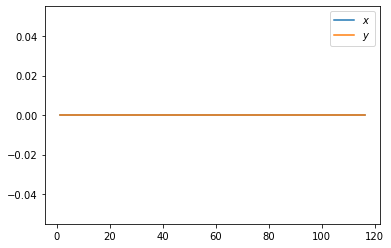

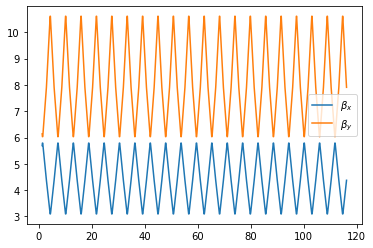

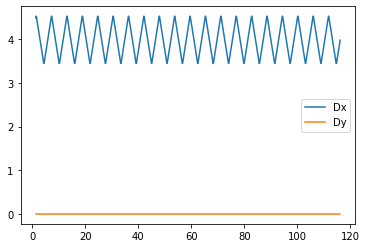

In [3]:
loco = Loco(engine='at')
loco.lattice = ring
loco.verbose = False
loco.correctors_indexes=get_refpts(ring, elements.Corrector)
loco.BPM_indexes=get_refpts(ring, elements.Monitor)
vis = False
loco.dkick = 0.001
loco.prepareTwiss()
beta_x = loco.opt[3].closed_orbit[:,0]
beta_y = loco.opt[3].closed_orbit[:,1]
p1,=plt.plot(loco.opt[3].s_pos,loco.opt[3].closed_orbit[:,0])
p2,=plt.plot(loco.opt[3].s_pos,loco.opt[3].closed_orbit[:,1])
plt.legend([p1,p2],[r'$x$',r'$y$'])
plt.figure()
p1,=plt.plot(loco.opt[3].s_pos,loco.opt[3].beta[:,0])
p2,=plt.plot(loco.opt[3].s_pos,loco.opt[3].beta[:,1])
plt.legend([p1,p2],[r'$\beta_x$',r'$\beta_y$'])
plt.figure()
p1,=plt.plot(loco.opt[3].s_pos,loco.opt[3].dispersion[:,0])
p2,=plt.plot(loco.opt[3].s_pos,loco.opt[3].dispersion[:,2])
plt.legend([p1,p2],['Dx','Dy'])

(40, 40)


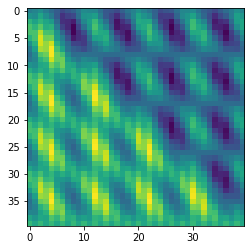

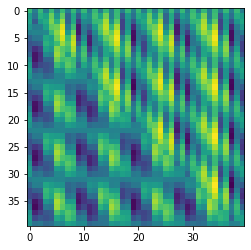

In [4]:
print(shape(loco.Cx))

plt.figure()
imshow(loco.Cx)
plt.show()

plt.figure()
imshow(loco.Cy)
plt.show()

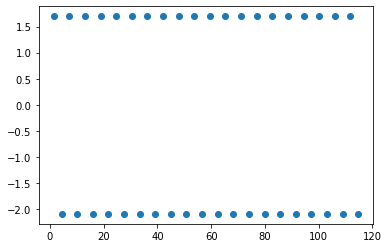

In [5]:
Quad_strength = []
i = 0
quad_indexes = get_refpts(ring, elements.Quadrupole)
while(i<len(quad_indexes)):
    #for j in range(quad_indexes):
    quad_strength = ring[quad_indexes[i]].K
    Quad_strength.append(quad_strength)

    i += 1


lindata0, tune, chrom, lindata = ring.linopt(get_chrom=True, refpts=quad_indexes)
s_pos = lindata['s_pos']
plt.scatter(s_pos,Quad_strength)
plt.show()

simulating perturbed machine...


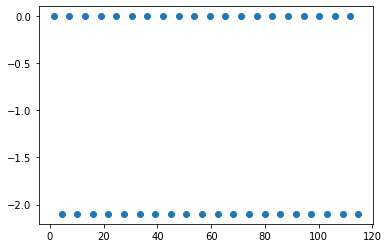

In [6]:
print('simulating perturbed machine...')
#loco.simulateMachine()
import random
Quad_strength_err = []
i = 0
quad_indexes = get_refpts(ring, elements.Quadrupole)
while(i<len(quad_indexes)):

    error = random.uniform(0, 0.001)
    #print(error)
    ring[quad_indexes[6]].K = error
    quad_strength_err = ring[quad_indexes[i]].K
    Quad_strength_err.append(quad_strength_err)

    i += 1

plt.scatter(s_pos,Quad_strength_err)
plt.show()

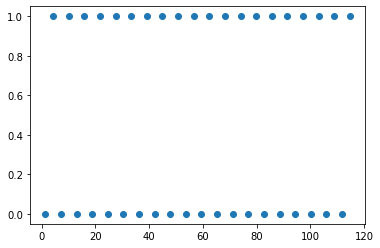

In [8]:
from AT import showQuadsDiff
showQuadsDiff(s_pos, Quad_strength, Quad_strength_err)

preparing twiss ..
Tunes=[0.60335247 0.71697756]
Chrom=[142.11200641 -82.66544554]
calculating ORM ...


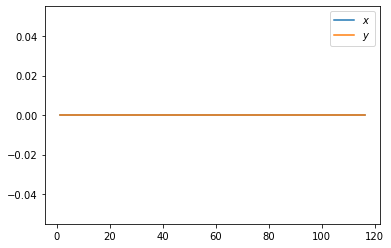

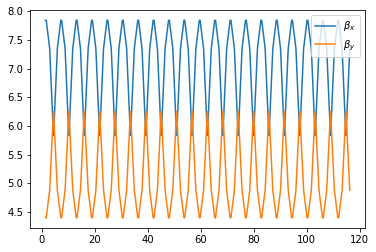

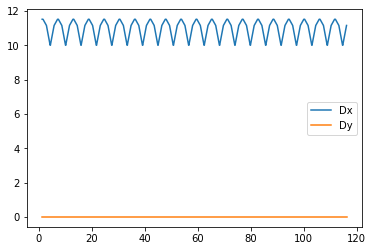

In [9]:
loco = Loco(engine='at')
loco.lattice = ring
loco.verbose = False
loco.correctors_indexes=get_refpts(ring, elements.Corrector)
loco.BPM_indexes=get_refpts(ring, elements.Monitor)
vis = False
loco.dkick = 0.0001
loco.prepareTwiss()

p1,=plt.plot(loco.opt[3].s_pos,loco.opt[3].closed_orbit[:,0])
p2,=plt.plot(loco.opt[3].s_pos,loco.opt[3].closed_orbit[:,1])
plt.legend([p1,p2],[r'$x$',r'$y$'])

plt.figure()
p1,=plt.plot(loco.opt[3].s_pos,loco.opt[3].beta[:,0])
p2,=plt.plot(loco.opt[3].s_pos,loco.opt[3].beta[:,1])
plt.legend([p1,p2],[r'$\beta_x$',r'$\beta_y$'])
plt.figure()
p1,=plt.plot(loco.opt[3].s_pos,loco.opt[3].dispersion[:,0])
p2,=plt.plot(loco.opt[3].s_pos,loco.opt[3].dispersion[:,2])
plt.legend([p1,p2],['Dx','Dy'])


perturped_beta_x = loco.opt[3].beta[:,0]
perturped_beta_y = loco.opt[3].beta[:,1]

In [14]:
from AT1 import getBetaBeat
bx , by = getBetaBeat(beta_x, beta_y, perturped_beta_x, perturped_beta_y)
#print("Simulated beta beat, x:{:3.4f} %   y: {:3.4f} %" + float(bx*100.,by*100.))
print("Simulated beta beat, x:" + str(bx*100) + "%   y: " +str(by*100) +"%")

Simulated beta beat, x:nan%   y: nan%


C:\Users\musa\pyat-loco-1\fodo_loco\AT1.py:16: RuntimeWarning: divide by zero encountered in true_divide
  bx = np.std((perturped_beta_x - beta_x )/beta_x)
C:\Users\musa\Anaconda3\lib\site-packages\numpy\core\_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
C:\Users\musa\pyat-loco-1\fodo_loco\AT1.py:17: RuntimeWarning: divide by zero encountered in true_divide
  by = np.std((perturped_beta_y - beta_y)/beta_y)


In [31]:
# Cell 2

In [25]:
print('measuring ORM with ' +str(len(loco.correctors_indexes)) + ' correctors...')

measuring ORM with 40 correctors...


Text(0, 0.5, 'correctors_kick')

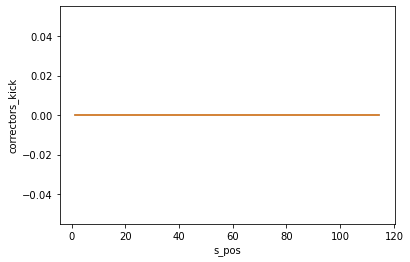

In [23]:
from AT import showCorrectors
correctors_indexes=get_refpts(ring, elements.Corrector)
lindata0, tune, chrom, lindata = ring.linopt(get_chrom=True, refpts=correctors_indexes)
s_pos = lindata['s_pos']
#a = showCorrectors(s_pos, correctors_indexes,lattice= ring)
#print(a)

correctors_kick_angle = []
i = 0
while (i < len(correctors_indexes)):
       corrector_kick_angle = ring[correctors_indexes[i]].KickAngle
       correctors_kick_angle.append(corrector_kick_angle)
       i += 1


plot(s_pos, correctors_kick_angle)
plt.xlabel('s_pos')
plt.ylabel('correctors_kick')

In [30]:
# Cell 2
correctors_indexes=get_refpts(ring, elements.Quadrupole)
correctors_kick_angle = []
i = 0
while (i < len(correctors_indexes)):
       corrector_kick_angle = ring[correctors_indexes[2]].KickAngle
       correctors_kick_angle.append(corrector_kick_angle)
       i += 1

AttributeError: 'Quadrupole' object has no attribute 'KickAngle'